In [175]:
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os

cwd = os.getcwd()
inputDir = cwd + "/input"

image = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
# display(pil_face_image)
# print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

for face_landmarks in face_landmarks_list:
    print("parametry częsci twarzy")
    print('left eye', face_landmarks['left_eye']) #6
    print('right eye', face_landmarks['right_eye']) #6
    print('nose tip', face_landmarks['nose_tip']) #5
    print('nose bridge', face_landmarks['nose_bridge']) #4
    print('top lip', face_landmarks['top_lip']) #12
    print('bottom lip', face_landmarks['bottom_lip']) #12

[(201, 409, 468, 141)]
parametry częsci twarzy
left eye [(59, 64), (75, 57), (91, 58), (105, 68), (90, 69), (73, 68)]
right eye [(173, 73), (188, 65), (204, 67), (216, 77), (203, 80), (188, 77)]
nose tip [(116, 135), (131, 140), (145, 144), (157, 142), (168, 139)]
nose bridge [(147, 62), (148, 81), (150, 101), (151, 121)]
top lip [(78, 179), (101, 169), (124, 166), (139, 170), (154, 169), (172, 175), (185, 189), (179, 188), (154, 177), (138, 176), (123, 174), (84, 179)]
bottom lip [(185, 189), (170, 204), (152, 208), (136, 208), (119, 205), (98, 198), (78, 179), (84, 179), (121, 194), (137, 197), (153, 196), (179, 188)]


In [176]:
#============================ JO
# encoding -> czy jestesmy w stanie porownac oko z okiem i sensownie to pokazać  
# jak bysmy np dali tylko czesc encoding do wyliczenia odleglosci euklidseowej

def get_outmost_coordinates(feature_coordinates):
    # TODO: zabezpieczyc na wypadek wyjscia poza picture, np. twarz jest w rogu zdjecia 
    # trzeba sprawdzic czy -/+ wychodzi poza size, jak tak to wziac wartosc z .size) 
    # ^ tylko jesli dataset bedzie zawieral takie zdjecia (wywali sie)
    # nie ma co sie meczyc na zas
    
    padding = 20
    return {
        'left': min(feature_coordinates, key=lambda e: e[0])[0] - padding,
        'top': min(feature_coordinates, key=lambda e: e[1])[1] - padding,
        'right': max(feature_coordinates, key=lambda e: e[0])[0] + padding,
        'bottom': max(feature_coordinates, key=lambda e: e[1])[1] + padding,
    }

def crop_feature(landmarks, feature, image):
    if not np.isscalar(feature):
        all_coordinates = {}
        for f in feature:
            all_coordinates[f] = get_outmost_coordinates(landmarks[f])
        
        coordinates = {
            'left': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['left'])]['left'],
            'top': all_coordinates[min(all_coordinates, key=lambda e: all_coordinates[e]['top'])]['top'],
            'right': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['right'])]['right'],
            'bottom': all_coordinates[max(all_coordinates, key=lambda e: all_coordinates[e]['bottom'])]['bottom'],
        }
    else: 
        coordinates = get_outmost_coordinates(landmarks[feature])
    
    return image.crop(tuple(coordinates.values()))

lewe oko


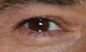

prawe oko


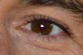

nos


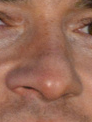

usta


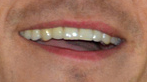

In [177]:
print("lewe oko")
leftEye = crop_feature(face_landmarks, feature = 'left_eye', image = pil_face_image) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks, feature = 'right_eye', image = pil_face_image)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks, feature = ['nose_bridge', 'nose_tip'], image = pil_face_image)
display(nose)

print("usta")
lips = crop_feature(face_landmarks, feature = ['top_lip', 'bottom_lip'], image = pil_face_image)
display(lips)

lewe oko


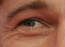

prawe oko


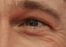

nos


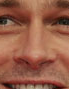

usta


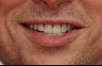

lewe oko


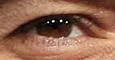

prawe oko


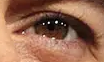

nos


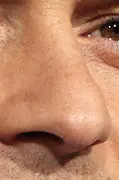

usta


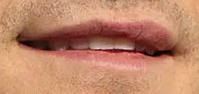

[False, True, True, False]
[(555, 484), (579, 470), (606, 470), (628, 486), (605, 490), (578, 490)]
[0.67199601 0.3229202  0.56885573 0.6025535 ]


AttributeError: module 'face_recognition' has no attribute '_raw_face_landmarks'

In [202]:
# to wszystko jest w ramach testu, ten cell mozna wyrzucic
# robie chamskie kopiuj wklej bo to powinno byc zrealizonane przez czarka
image2nd = face_recognition.load_image_file(inputDir + "/brad_pitt/brad.jpg")
image3rd = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_2.jpg")

face_locations_2nd = face_recognition.face_locations(image2nd)
face_locations_3rd = face_recognition.face_locations(image3rd)

for face_location in face_locations_2nd:
    top, right, bottom, left = face_location
    face_image_2 = image2nd[top:bottom, left:right]
    pil_face_image_2 = Image.fromarray(face_image_2)
    
for face_location in face_locations_3rd:
    top, right, bottom, left = face_location
    face_image_3 = image3rd[top:bottom, left:right]
    pil_face_image_3 = Image.fromarray(face_image_3)
    
face_landmarks_list_2 = face_recognition.face_landmarks(face_image_2, model='large')
face_landmarks_list_3 = face_recognition.face_landmarks(face_image_3, model='large')


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_2[0], feature = 'left_eye', image = pil_face_image_2) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_2[0], feature = 'right_eye', image = pil_face_image_2)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_2[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_2)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_2[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_2)
display(lips)


print("lewe oko")
leftEye = crop_feature(face_landmarks_list_3[0], feature = 'left_eye', image = pil_face_image_3) # opcjonalnie do dolozenia brewki
display(leftEye)

print("prawe oko")
rightEye = crop_feature(face_landmarks_list_3[0], feature = 'right_eye', image = pil_face_image_3)
display(rightEye)

print("nos")
nose = crop_feature(face_landmarks_list_3[0], feature = ['nose_bridge', 'nose_tip'], image = pil_face_image_3)
display(nose)

print("usta")
lips = crop_feature(face_landmarks_list_3[0], feature = ['top_lip', 'bottom_lip'], image = pil_face_image_3)
display(lips)


image4 = face_recognition.load_image_file(inputDir + "/orlando_bloom/Orlando_Bloom_3.png")
image5 = face_recognition.load_image_file(inputDir + "/orlando_bloom/tego_nie_rozpoznaje_przy_defaultowych_wartosciach.jpg") #Orlando_Bloom_4
face_locations_4 = face_recognition.face_locations(image4)
face_locations_5 = face_recognition.face_locations(image5)
enc_4 = face_recognition.face_encodings(image4, face_locations_4)
enc_5 = face_recognition.face_encodings(image5, face_locations_5)

face_encodings = [ 
    face_recognition.face_encodings(image2nd, face_locations_2nd)[0], 
    face_recognition.face_encodings(image3rd, face_locations_3rd)[0], 
    face_recognition.face_encodings(image4, face_locations_4)[0], 
    face_recognition.face_encodings(image5, face_locations_5)[0], 
]
face_encoding = face_recognition.face_encodings(image, face_locations)[0]

print(face_recognition.compare_faces(face_encodings, face_encoding))

# single feature
print(face_landmarks['left_eye'])
print(face_recognition.face_distance(face_encodings, face_encoding))



#============================ koniec JO

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(395, 508), (398, 569), (400, 628), (412, 689), (444, 742), (497, 782), (562, 812), (628, 828), (691, 829), (742, 816), (772, 782), (796, 741), (808, 695), (819, 649), (828, 603), (831, 558), (827, 516)]
The left_eyebrow in this face has the following points: [(499, 464), (536, 437), (583, 423), (632, 425), (679, 438)]
The right_eyebrow in this face has the following points: [(730, 444), (760, 435), (791, 435), (817, 446), (828, 472)]
The nose_bridge in this face has the following points: [(708, 474), (716, 506), (726, 539), (735, 572)]
The nose_tip in this face has the following points: [(666, 600), (689, 609), (713, 618), (731, 613), (745, 603)]
The left_eye in this face has the following points: [(555, 484), (579, 470), (606, 470), (628, 486), (605, 490), (578, 490)]
The right_eye in this face has the following points: [(733, 493), (756, 478), (780, 481), (796, 499), (780, 502), (756, 499)]
The to

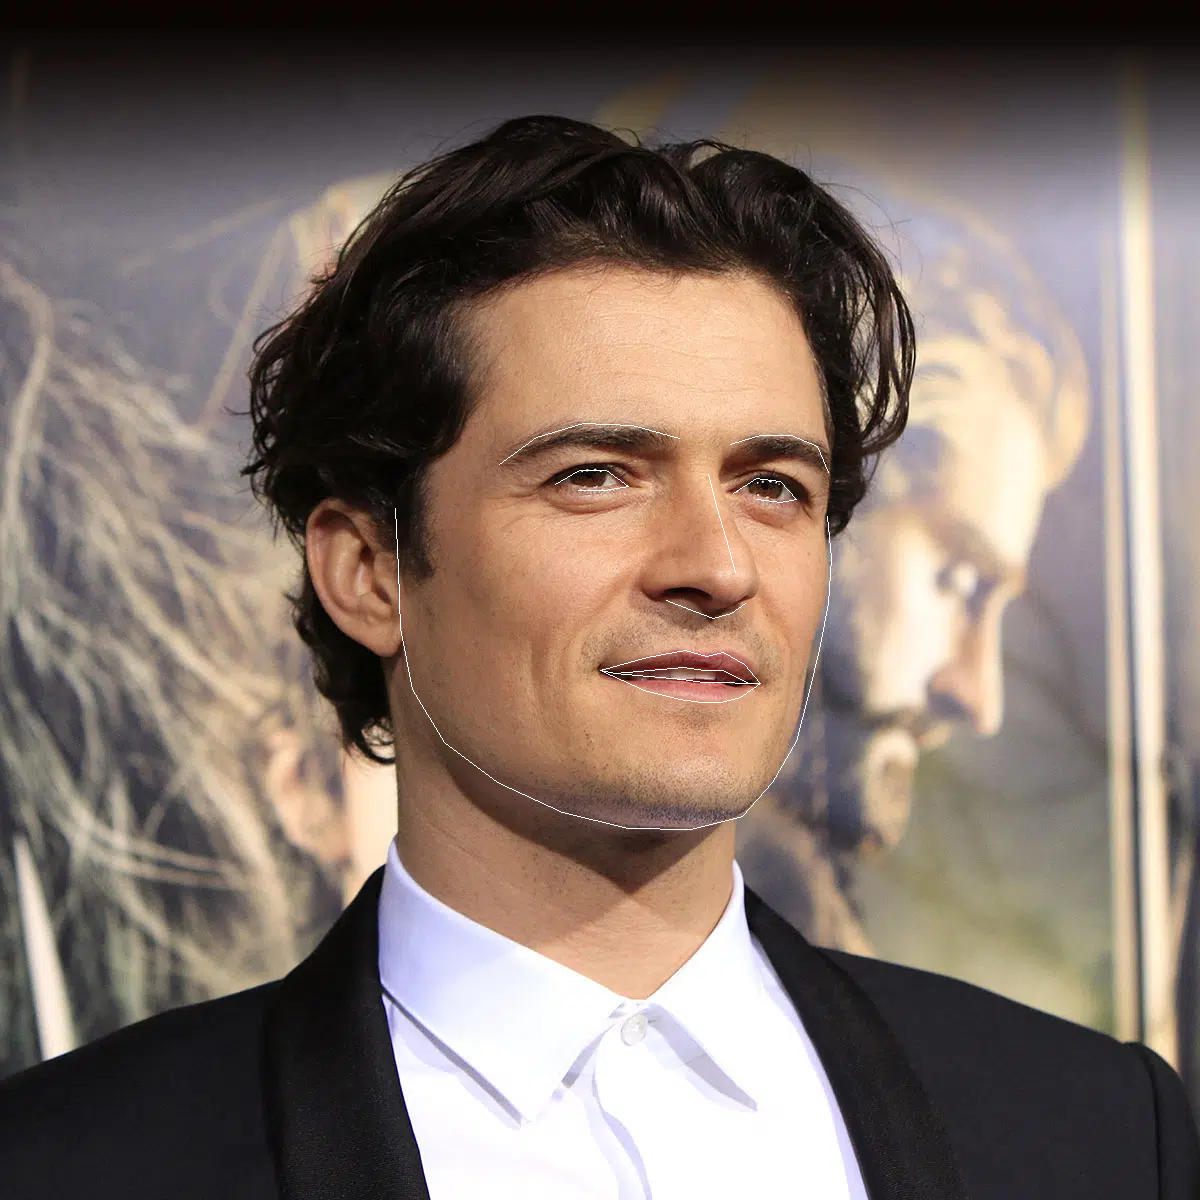

In [204]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
# image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")
image_to_draw = image3rd

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image_to_draw)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image_to_draw)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!  
    for facial_feature in face_landmarks.keys():
#         if facial_feature == 'left_eye':
#             d.line((face_landmarks[facial_feature][0],face_landmarks[facial_feature][3]), width=3)
#             d.line((face_landmarks[facial_feature][5],face_landmarks[facial_feature][2]), width=3)
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#